# Outlier
An outlier is an observation that lies outside the overall pattern of a distribution (Moore and McCabe 1999). It can be found by residual plots and scatter plot of X, y points.

Solving environment: done

# All requested packages already installed.



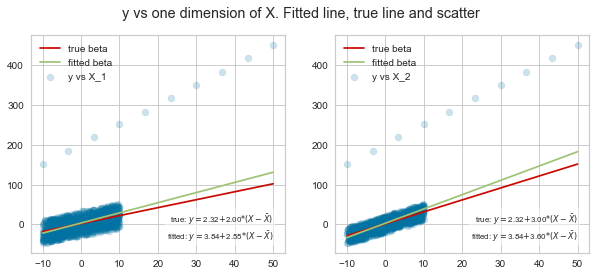

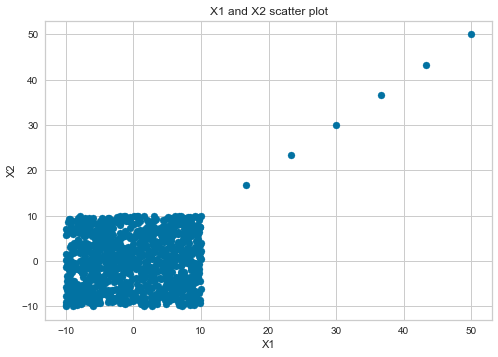

Fig. 1 Scatter plots of X vs y  and X1 vs X2


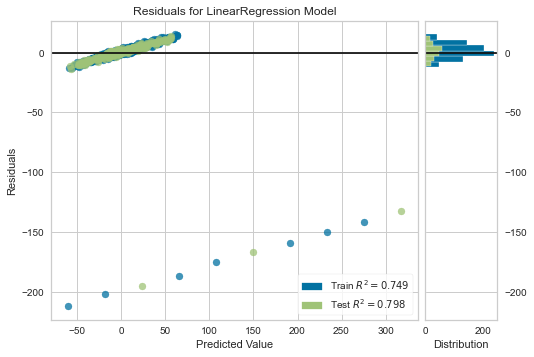

Fig. 2 Residual Plot


In [6]:
# This is a kind of hack to put the /src folder into the python path. see:
# https://stackoverflow.com/questions/61234609/how-to-import-python-package-from-another-directory
import sys
sys.path.insert(0, '../src')
!conda install --yes --prefix {sys.prefix} yellowbrick

#adapted from our work Outlier_analysis.py

from regression import GenerateData, UniformX #our work
from Outlier import Outlier, Outlier_position #our work
from simulation import print_coef, simulation, change_factor #our work
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#need prior installation in terminal: 
#"conda install -c districtdatalabs yellowbrick" 
#then "conda install -c conda-forge yellowbrick"
from yellowbrick.regressor import ResidualsPlot 


#set original dataset X, y
set1=UniformX(N=1000, beta=(1, 2, 3), noise_var=1, random_seed=42)
set1.generate_dataset()
X=set1.X
y=set1.y

#outlier specification
outlier_number = 10
outlier_magnitude = 200
positions=Outlier_position(start_position=[-10,-10], end_position=[50,50], N=outlier_number)

#how to detect outliers


#initialize for object of GenerateData sub class Outlier
demo1=Outlier(random_seed=42)

#generate outliers to X, y for demo1
demo1.generate_dataset(magnitude=outlier_magnitude, original_X=X, original_y=y, original_beta=set1.beta, positions=positions)

demo1.fit()

#scatterplot of X, y
demo1.plot2D()
plt.show()

#scatterplot of X1, X2
plt.scatter(demo1.X[:,0],demo1.X[:,1])
plt.title("X1 and X2 scatter plot")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
print("Fig. 1 Scatter plots of X vs y  and X1 vs X2")


#initialize for object of GenerateData sub class Outlier
demo2=Outlier(random_seed=42)
#generate outliers to X, y for demo2
demo2.generate_dataset(magnitude=outlier_magnitude, original_X=X, original_y=y, original_beta=set1.beta, positions=positions)

#residual plot - library reference: https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
X_train, X_test, y_train, y_test = train_test_split(demo2.X, demo2.y, test_size=0.2, random_state=42) # split the train and test data
model = LinearRegression() # Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure
print("Fig. 2 Residual Plot")



# Detection of outliers
Fig. 1 scatter plot of X and y visualizes outliers in the top, while scatter plot of X1 and X2 have some outliers hidden in the normal range of feature space.
In Fig. 2 Residual plots - outliers are found in the far negative area. In the histogram of residual plot, however, the outlier is too small to see as proportion by count is too small compared with 1000 samples. If standardized, residuals beyond +/- 3 may typically be regarded as outliers. Note that if outliers become too influential (say, because sample size not enough), coefficients may be distorted to fit the outlier such that the residuals measured by fitted model may not be obvious for the outlier. Check further by removing a suspected outlier (e.g. in Fig.1) to see if it greatly affects the model and check the accuracy of raw data.

# Impact of outliers
An outlier can affect the linear regression model greatly as the difference is squared for minimization. We will study how outliers affect the intercept, coefficients, residuals and R2 score of the model by using the same true linear model y = 1 + 2X1 + 3X2 + e (where e is random noise variable ~N(0,1)) with 1000 samples X1 , X2 generated from uniform distribution (-10,10). Then add outliers with specified magnitude, number and position. This is repeated 1000 times for calculating the variance and mean of key estimates. Further repeat above by varying the position, magnitude, number of outliers to study the impact.


testing impact of number of outliers


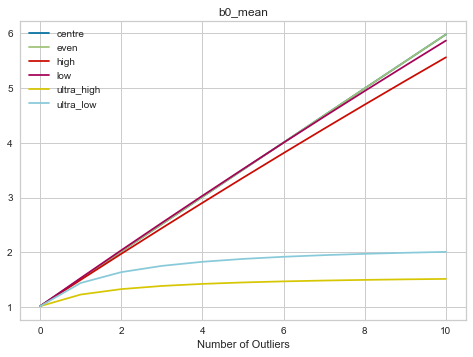

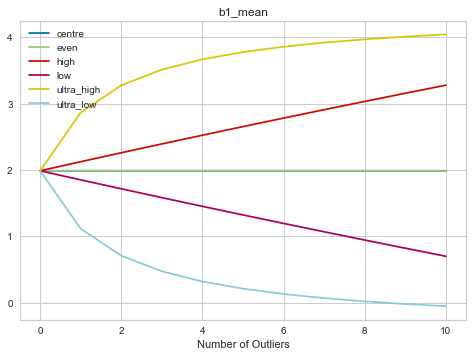

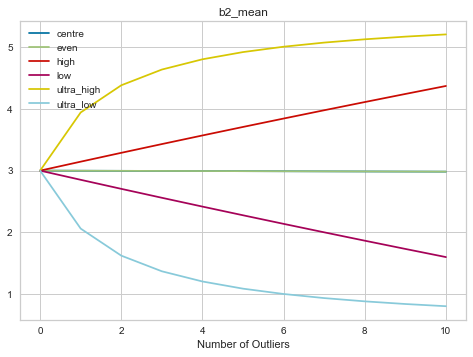

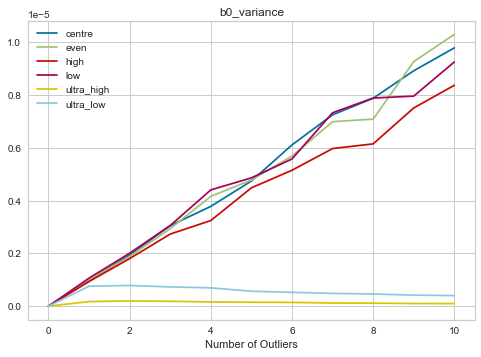

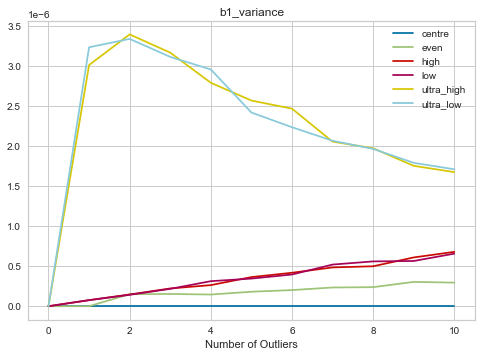

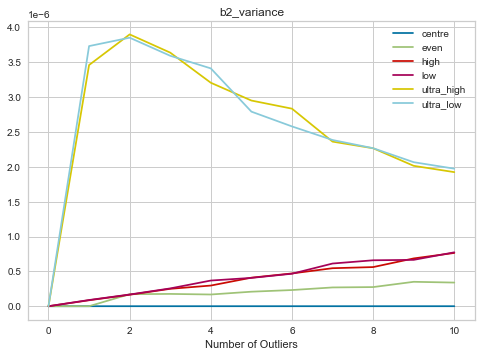

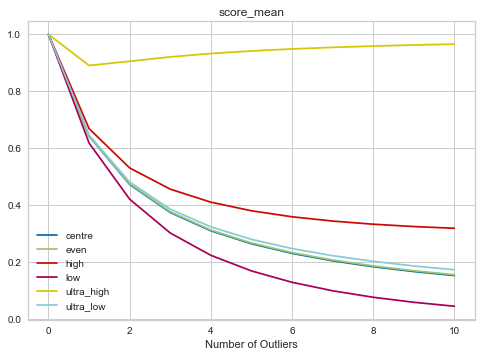

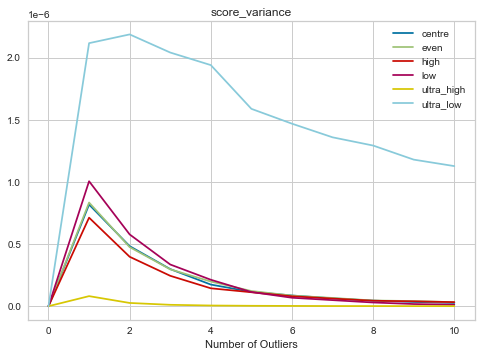

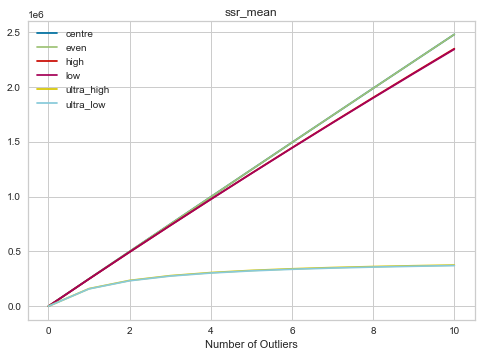

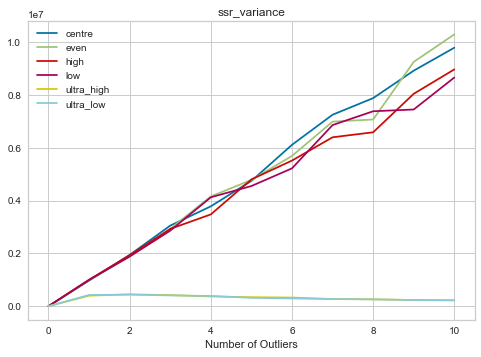

In [3]:
#testing impact

#test1 - test impact of Num of Outliers, 
#assuming i)evenly spread, ii)high end value of input X, iii)low end, iv)centre value of input X

#initialize for object of GenerateData sub class Outlier

test1=Outlier(random_seed=42)
outlier_magnitude = 500

#initialize different scenarios of outlier positions, and set varying number of outliers for each scenario
Number_of_outliers = np.arange(0,11)
p = ['centre', 'even', 'high','low','ultra_high', 'ultra_low']
pos = {k:None for k in p}
num = {k:None for k in p}
pos['centre']=[Outlier_position([0,0],N=i) for i in Number_of_outliers]
pos['even']=[Outlier_position([10,10],[-10,-10],N=i) for i in Number_of_outliers]
pos['high']=[Outlier_position([10,10],N=i) for i in Number_of_outliers]
pos['low']=[Outlier_position([-10,-10],N=i) for i in Number_of_outliers]
pos['ultra_high']=[Outlier_position([100,100],N=i) for i in Number_of_outliers]
pos['ultra_low']=[Outlier_position([-100,-100],N=i) for i in Number_of_outliers]


#create dictionary of dictionary storing results based on varying number of outliers for 4 position scenarios
for position in p:
    num[position] = change_factor(test1, 1000,factor={"positions":pos[position]}, magnitude=outlier_magnitude, original_X=X, original_y=y, original_beta=set1.beta,)

#create chart to show impact on coefficients against number of outliers
print('testing impact of number of outliers')
for estimate_key in ["b0_mean", "b1_mean", "b2_mean", "b0_variance", "b1_variance", "b2_variance","score_mean", "score_variance", "ssr_mean", "ssr_variance"]:
    for position in p:
        plt.plot(Number_of_outliers, num[position][estimate_key], label = position)   
    plt.title(estimate_key)
    plt.xlabel('Number of Outliers')
    plt.legend()
    plt.show()
    

testing impact of magnitude of outliers


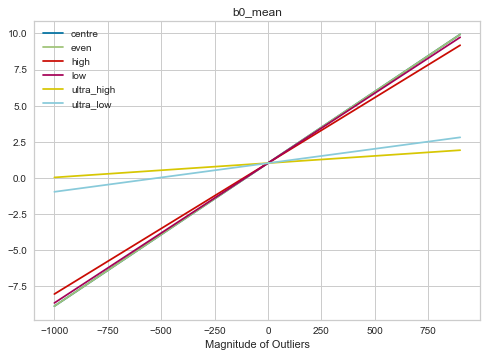

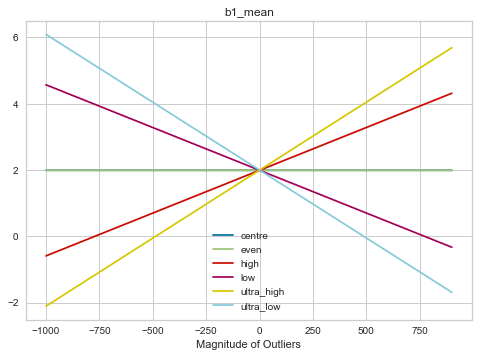

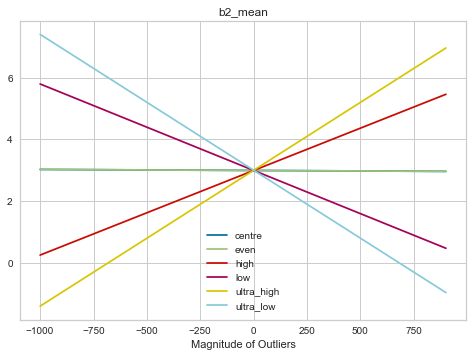

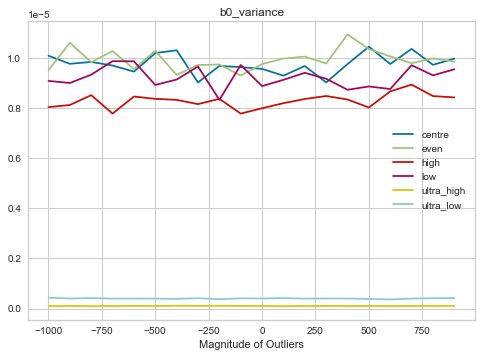

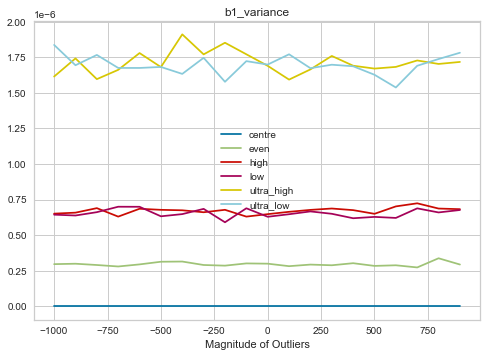

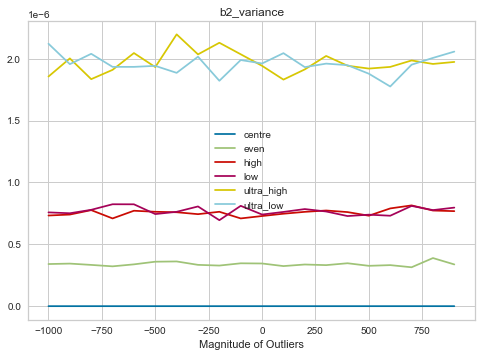

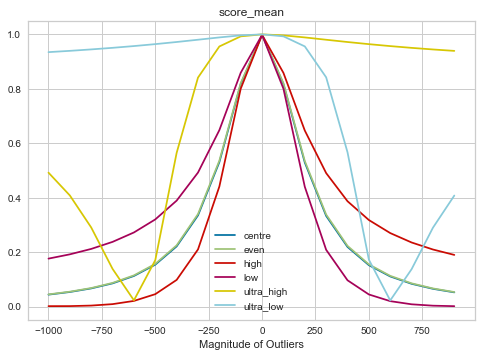

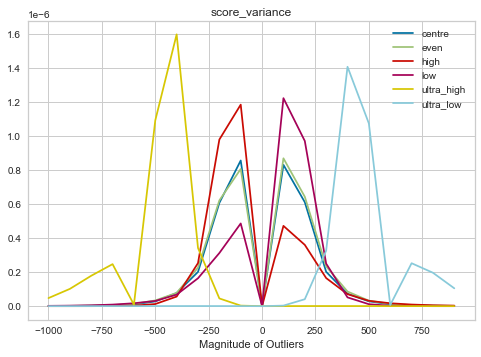

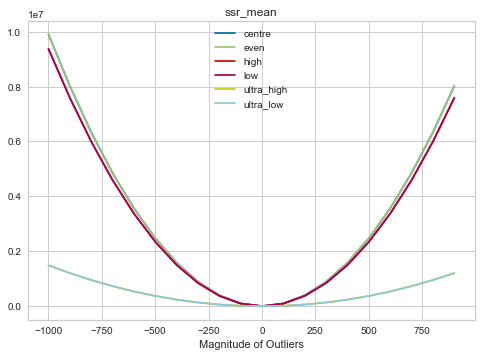

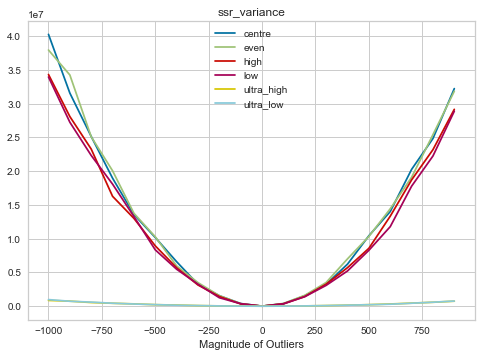

In [4]:
#test2 - test impact of magnitude of Outliers, 
#assuming i)evenly spread, ii)high end value of input X, iii)low end, iv)centre value of input X

#initialize for object of GenerateData sub class Outlier
test2=Outlier(random_seed=42)
outlier_number = 10

#initialize different scenarios of outlier positions, and set varying number of outliers for each scenario
Magnitude_of_outliers = np.arange(-1000,1000, step=100)
pos = {k:None for k in p}
mag = {k:None for k in p}
pos['centre']=Outlier_position([0,0], N=outlier_number) 
pos['even']=Outlier_position([10,10],[-10,-10], N=outlier_number)
pos['high']=Outlier_position([10,10], N=outlier_number)
pos['low']=Outlier_position([-10,-10], N=outlier_number)
pos['ultra_high']=Outlier_position([100,100], N=outlier_number)
pos['ultra_low']=Outlier_position([-100,-100], N=outlier_number)


#create dictionary of dictionary storing results based on varying magnitude of outliers for 4 position scenarios
for position in p:
    mag[position] = change_factor(test2, 1000,factor={"magnitude":Magnitude_of_outliers},positions=pos[position], original_X=X, original_y=y, original_beta=set1.beta,)

#create chart to show impact on coefficients against magnitude of outliers
print('testing impact of magnitude of outliers')
for estimate_key in ["b0_mean", "b1_mean", "b2_mean", "b0_variance", "b1_variance", "b2_variance","score_mean", "score_variance", "ssr_mean", "ssr_variance"]:
    for position in p:
        plt.plot(Magnitude_of_outliers, mag[position][estimate_key], label = position)   
    plt.title(estimate_key)
    plt.xlabel('Magnitude of Outliers')
    plt.legend()
    plt.show()

# Summary of findings from 20 charts above
Position matters a lot - outliers at centre of feature space do not affect b1 at all! Evenly distributed outliers across the feature space may slightly change b1, but the mean of b1 remain the same as the true model and the variance is smaller than if outliers are concentrated all at the high end (or all at the low end) of the feature space. The mean of b1 is in linear relationship with magnitude of unevenly distributed outliers. Number of outliers also have similar relationship except ultra-outliers (we define as those far beyond the normal range of feature space X1 , X2), which can change b1 sharply with just one or two outliers. b1 variance increases with number of outliers but only fluctuates with magnitude, except ultra-outliers, which increases b1 variance sharply for first couple of outliers and then decreases.  
The charts for coefficients b2 show the same properties as b1.

Intercept – its mean increases linearly with magnitude of outliers, regardless of the positions, though ultra-outliers have much less impact. It also increases with number of outliers, except the ultra, which doesn’t change its mean much after the first couple of outliers. Interestingly, while the intercept variance increases with the number of outliers (except ultra, which decreases its variance after the first outlier), it only fluctuates with the magnitude of the outliers.

Residuals can be measured by sum of squares of residuals (ssr). The mean of ssr increases linearly with number of outliers and quadratically with the magnitude for all positions of outliers except for ultra, which increases ssr mean slightly and then almost flattens with more number of outliers. The ssr variance has the same shape as the mean of ssr, though less smoothly and ultra is an exception – it decreases ssr variance after the first one or two outliers.

R2 score = 1 - ssr/Var(Y) , interpreted as proportion of explained variance, is commonly used as one indicator of fitness of the model, though it may need adjustment when compared with models of different number of parameters. Its mean generally decreases with absolute magnitude and number of outliers, which implies that ssr increases more than the total variance. Its variance also have same shape except at the point of zero magnitude or zero number of outliers. The exception is ultra – after the first outlier, the score improves a bit with more outliers. Coefficients are so much influenced to fit ultra-outliers that more ultra-outliers make it more plausible to keep model coefficients which already incline to fitting ultra-outliers. This gives us an alert that we cannot simply detect presence of outliers by R2 score, especially for ultra-ones. And for ultra-high outliers, the mean of score only slightly decreases with higher positive magnitude of outliers.